# Ugulava George Assignment 3 : Clasterization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN,KMeans
import pandas as pd
%matplotlib inline
from sklearn.neighbors import NearestNeighbors
from random import sample
data = pd.read_table('clustering.txt', delimiter = ' ', lineterminator = '\n',
                    names = ['attr1','attr2'])
labels = DBSCAN(eps = 9,min_samples = 18).fit_predict(data.as_matrix())
#do not count noise as cluster
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)
colors = np.array(['b','g','r','c','m','y'])
X = data.as_matrix()

## From experiments, i can conclude, that for this data set DBSCAN works well when eps ~= 2*min_sumples.(From eps = 9 to 18)

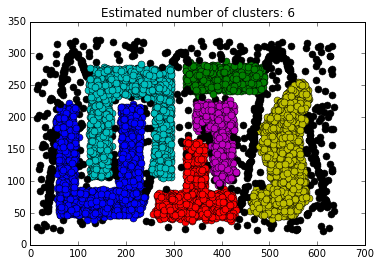

In [2]:
#visualization
i = 0
for x,y in X:
    color = colors[labels[i]]
    if labels[i] == -1:
        color = 'k'
    plt.plot(x,y, 'o', markerfacecolor = color, markersize = 7)
    i += 1 
plt.title('Estimated number of clusters: %d' % n_clusters)
plt.show()

In [3]:
d = 2 # columns
n = 8000 # rows
m = int(0.1 * n)
neigbors = NearestNeighbors(n_neighbors = 1, algorithm = 'brute').fit(X)
sample_X = sample(range(0,n,1),m)
ujd = []
wjd = []
for j in range (0,m):
    u_dist, _ = neigbors.kneighbors(np.random.normal(size=(1, d)).
                                reshape(1, -1), 2, return_distance=True)
    ujd.append(u_dist[0][1])
    w_dist, _ = neigbors.kneighbors(X[sample_X[j]].reshape(1, -1), 2,
                                    return_distance=True)
    wjd.append(w_dist[0][1])
H = sum(ujd) / (sum(ujd) + sum(wjd))
print ('Hopkins statistics = ', H)

Hopkins statistics =  0.942749163447


### the value is between {0.7, ..., 0.99}, it has a high tendency to cluster. 


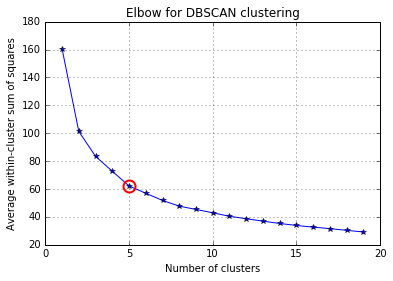

In [4]:
from scipy.spatial.distance import cdist, pdist
K = range(1,20)
kMeansVar = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [V.cluster_centers_ for V in kMeansVar]
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]
kIdx = 4
plt.plot(K, avgWithinSS, 'b*-')
plt.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for DBSCAN clustering')
plt.show()

## Elbow method told us that the best number of clusters is five, however in practice usage of 6 clasters instead of 5 seems better. 